# World Poverty Measure

Data Analysis

Team members:

Sandeep Yadav Pala Sreeramulu      (Net id: spalas3)
Thashma Nellira Dechamma           (Net id: dn7)
Akshat Gupta                       (Net id: akshatg2)

In [99]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [100]:
'''
This dataset contains the world poverty data based on the Multi Dimensional Poverty index which has the following 10 factors:
Health :- Nutrition, Child mortality
Education :- Years of schooling, School attendance
Living Standards :- Cooking fuel, Sanitation, Drinking water, Electricity, Housing, Assets
'''
xls = pd.ExcelFile('MPI Dataset 2021.xlsx')
mpi_df = pd.read_excel(xls, 'Sheet1')
mpi_df.sample(10)

,Country Numeric Code,Country Code,Country,World Region,Survey,Year,Multidimensional Poverty Index (MPI),Nutrition,Child mortality,Years of schooling,School attendance,Cooking fuel,Sanitation,Drinking water,Electricity,Housing,Assets,Total number of indicators included,Indicator (s) missing
50,68,BOL,Bolivia,Latin America and the Caribbean,EDSA,2016,0.037754,3.709812,0.516874,5.717989,1.415691,7.110881,8.657100,3.016091,3.779428,7.500017,3.813070,10,NaN
19,498,MDA,Moldova,Europe and Central Asia,MICS,2012,0.003534,0.194721,0.000000,0.694186,0.204435,0.604277,0.721445,0.583815,0.055277,0.552623,0.563566,10,NaN
66,320,GTM,Guatemala,Latin America and the Caribbean,DHS,2014-2015,0.133518,18.985577,2.103575,15.974353,12.065980,27.843192,10.840516,10.474930,10.120378,22.739497,10.925110,10,NaN
61,418,LAO,Lao PDR,East Asia and the Pacific,MICS,2017,0.108333,12.043056,1.926017,16.648962,9.134705,22.899826,17.188197,10.444883,6.067613,12.024582,7.116530,10,NaN
18,776,TON,Tonga,East Asia and the Pacific,MICS,2019,0.003336,0.304146,0.460735,0.134528,0.680226,0.256515,0.127915,0.053358,0.057302,0.704978,0.066105,10,NaN
52,266,GAB,Gabon,Sub-Saharan Africa,DHS,2012,0.069695,9.901954,3.751371,5.778647,3.164119,9.648234,14.603901,10.020661,7.419477,9.243441,6.727666,10,NaN
40,608,PHL,Philippines,East Asia and the Pacific,DHS,2017,0.024249,NaN,1.477301,2.946166,1.567284,5.200784,3.621322,1.983046,2.534250,4.433799,3.471456,9,Nutrition
106,854,BFA,Burkina Faso,Sub-Saharan Africa,DHS,2010,0.523424,47.403733,16.989490,68.402534,58.414526,83.617089,76.533313,41.298825,81.749864,71.740478,13.593288,10,NaN
7,400,JOR,Jordan,Arab States,DHS,2017-2018,0.001526,0.175637,0.167731,0.245264,0.244469,0.009403,0.039202,0.057727,0.000000,0.107639,0.033383,10,NaN
41,710,ZAF,South Africa,Sub-Saharan Africa,DHS,2016,0.024891,4.649155,1.244682,1.563912,0.393360,4.433073,2.057524,3.803734,3.554453,4.156268,3.244780,10,NaN


In [101]:
world_bank_df = pd.read_csv('World Bank Data.csv')
# The dataset from World Bank has the world poverty which is the traditional income based
world_bank_df.dropna(subset=['World_Bank_Estimate'], inplace=True)
world_bank_df = world_bank_df.sort_values(by = 'World_Bank_Estimate', ascending=False)
world_bank_df = world_bank_df.reset_index(drop=True)
world_bank_df

,Country,Population_Below_Poverty_National_Year,Population_Below_Poverty_National,Population_Below_Poverty_Rural,Population_Below_Poverty_Urban,Poverty_Gap_Year,Reference_Year,World_Bank_Estimate,Income_Lowest_10,Income_Lowest_20,...,Income_Highest_20,Income_Highest_10,Baseline_Year,Recent_Year,Annualized_Growth_Bottom_40,Annualized_Growth_Total_Population,Mean_Consumption_Bottom_40_Baseline,Mean_Consumption_Bottom_40_Most_Recent,Mean_Consumption_Total_Population_Baseline,Mean_Consumption_Total_Population_Most_Recent
0,Slovak Republic,2017.0,12.2,NaN,NaN,NaN,2014.0,63.0,0.9,2.4,...,68.2,50.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Morocco,2013.0,4.8,1.4,15.0,2017.0,2015.0,59.1,1.0,2.8,...,63.7,47.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,St. Lucia,2016.0,25.0,12.2,44.0,2014.0,1999.0,57.6,NaN,NaN,...,60.2,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,West Bank and Gaza,2016.0,29.2,0.8,4.5,2016.0,2015.0,57.1,1.0,2.9,...,61.3,44.4,2011.0,2016.0,-0.9,-0.6,5.5,5.2,11.2,10.9
4,Russian Federation,2018.0,12.9,NaN,NaN,NaN,2017.0,56.3,1.3,3.9,...,61.2,49.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Mauritius,2017.0,10.3,15.4,38.7,2013.0,2018.0,25.7,4.4,10.2,...,36.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,Belarus,2018.0,5.6,0.0,0.0,2018.0,2018.0,25.2,4.3,10.1,...,35.5,21.4,2013.0,2018.0,0.7,0.0,11.9,12.3,20.2,20.2
161,Seychelles,2013.0,39.3,NaN,NaN,NaN,2016.0,25.2,2.9,8.7,...,34.0,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,Denmark,2018.0,12.5,17.0,39.8,2017.0,2017.0,24.9,4.2,10.2,...,35.4,21.5,2012.0,2017.0,3.5,2.8,16.3,19.4,27.1,31.2


<AxesSubplot:xlabel='Country'>

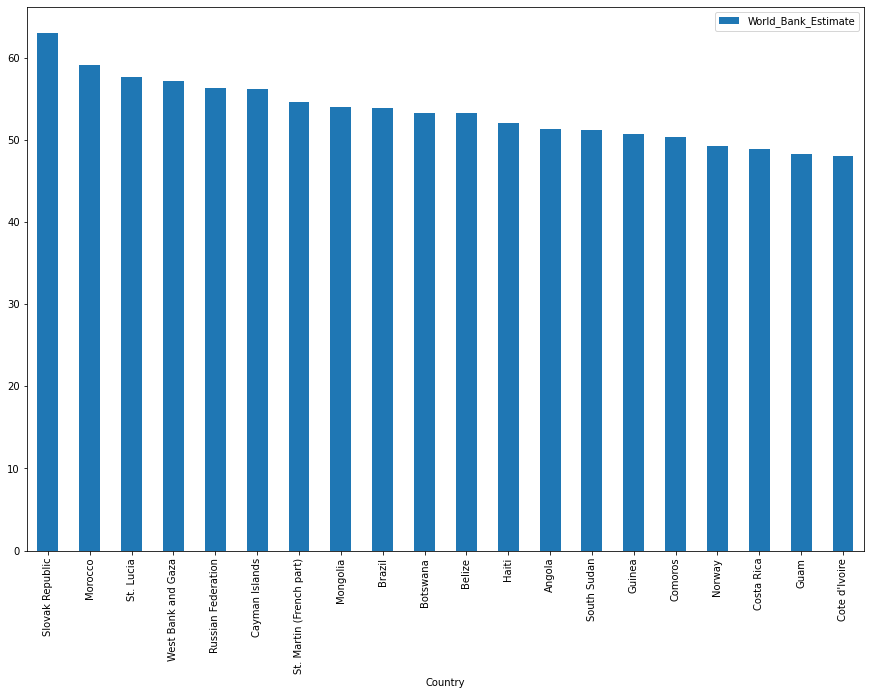

In [102]:
world_bank_df.head(20).plot.bar(x='Country', y='World_Bank_Estimate', figsize=(15, 10))

The above plot shows the countries with the highest poverty estimates obtained from the World Bank. This list was estimated by World Bank using the income factors of each country unlike in the MPI index list.

In [103]:
national_mpi_df = pd.read_csv('MPI_national.csv')
national_mpi_df

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9
...,...,...,...,...,...,...,...,...
97,CAF,Central African Republic,0.289,58.2,49.7,0.519,89.79,57.8
98,LBR,Liberia,0.290,60.5,48.0,0.481,84.86,56.6
99,SOM,Somalia,0.293,55.9,52.4,0.651,96.92,67.2
100,TCD,Chad,0.351,64.8,54.1,0.609,93.41,65.2


In [104]:
def createNewMpiCalculatedColumn(weightList, df, columnName):
    """Returns the percentage match of the poverty rankings between the two sets of data selected.
    :weightList: 
    :df: a dataframe with poverty data obtained by the survey data of world bank.
    :columnName: The column Whose weight is.
    :return: the column that has been manipulated.
    >>> primary_df = {"Country Numeric Code": ['360'], "Country Code": ['IDN'], "Country": ['Indonesia'], "World Region": ['East Asia and the Pacific'], "Survey": ['DHS'], "Year": ['2017'], "Multidimensional Poverty Index (MPI)": ['0.014011'],"Nutrition":['NaN'],"Child mortality":['1.460288'], "Years of schooling": ['1.551531'], "School attendance": ['0.69869'], "Cooking fuel": ['2.379687'],"Sanitation": ['2.181947'], "Drinking water": ['1.350654'], "Electricity": ['0.770641'],"Housing":['1.309179'],"Assets":['1.71485'],"Total number of indicators included":['9'],"New MPI":['NaN']}
    >>> df = {"Country": ['Indonesia'], "Population_Below_Poverty_National_Year": ['2018.0'], " Population_Below_Poverty_National": ['9.8'], " Population_Below_Poverty_Rural": ['1.7'], " Population_Below_Poverty_Urban": [’14.8'], " Poverty_Gap_Year ": ['2012.0'], " Reference_Year": ['2012.0']," World_Bank_Estimate":['29.5']," Income_Lowest_10":['3.7'], " Income_Lowest_20": ['8.8'], " Income_Highest_10": ['23.7'], " Baseline_Year": ['2014.0']," Recent_Year": ['2017.0'], " Annualized_Growth_Bottom_40": ['-0.1], " Annualized_Growth_Total_Population": ['1.9']," Mean_Consumption_Bottom_40_Baseline":['6.6']," Mean_Consumption_Bottom_40_Most_Recent":['6.6']," Mean_Consumption_Total_Population_Baseline ":['15.4']," Mean_Consumption_Total_Population_Most_Recent ":['16.2'], 10% Difference":['20.0']}    >>> getDifferenceInPovertyIn2DFs(primary_df, df, code_or_name_comparision)
    33.33
    >>> columnName: 'New MPI'
    """
    df[columnName] = ((df['Nutrition']*weightList[0]) + (df['Child mortality']*weightList[1]) + 
                      (df['Years of schooling']*weightList[2]) + (df['School attendance']*weightList[3]) +
                      (df['Cooking fuel']*weightList[4]) + (df['Sanitation']*weightList[5]) +
                      (df['Drinking water']*weightList[6]) + (df['Electricity']*weightList[7]) +
                      (df['Housing']*weightList[8]) + (df['Assets']*weightList[9]))/10
    return df[columnName]

In [105]:
def getDifferenceInPovertyIn2DFs(primary_df, df, code_or_name_comparision):
    """Returns the percentage match of the poverty rankings between the two sets of data selected.
    :primary_df: a dataframe consisting poverty data calculated using MPI.
    :df: a dataframe with poverty data obtained by the survey data of world bank.
    :code_or_name_comparision: a variable that stores the country code or the country name used for comparison.
    :return: a value indicating the percentage match 
    >>> primary_df = {"Country Numeric Code": ['360'], "Country Code": ['IDN'], "Country": ['Indonesia'], "World Region": ['East Asia and the Pacific'], "Survey": ['DHS'], "Year": ['2017'], "Multidimensional Poverty Index (MPI)": ['0.014011'],"Nutrition":['NaN'],"Child mortality":['1.460288'], "Years of schooling": ['1.551531'], "School attendance": ['0.69869'], "Cooking fuel": ['2.379687'],"Sanitation": ['2.181947'], "Drinking water": ['1.350654'], "Electricity": ['0.770641'],"Housing":['1.309179'],"Assets":['1.71485'],"Total number of indicators included":['9'],"New MPI":['NaN']}
    >>> code_or_name_comparision = 'Indonesia'
    >>> df = {"Country": ['Indonesia'], "Population_Below_Poverty_National_Year": ['2018.0'], " Population_Below_Poverty_National": ['9.8'], " Population_Below_Poverty_Rural": ['1.7'], " Population_Below_Poverty_Urban": [’14.8'], " Poverty_Gap_Year ": ['2012.0'], " Reference_Year": ['2012.0']," World_Bank_Estimate":['29.5']," Income_Lowest_10":['3.7'], " Income_Lowest_20": ['8.8'], " Income_Highest_10": ['23.7'], " Baseline_Year": ['2014.0']," Recent_Year": ['2017.0'], " Annualized_Growth_Bottom_40": ['-0.1], " Annualized_Growth_Total_Population": ['1.9']," Mean_Consumption_Bottom_40_Baseline":['6.6']," Mean_Consumption_Bottom_40_Most_Recent":['6.6']," Mean_Consumption_Total_Population_Baseline ":['15.4']," Mean_Consumption_Total_Population_Most_Recent ":['16.2'], 10% Difference":['20.0']}    >>> getDifferenceInPovertyIn2DFs(primary_df, df, code_or_name_comparision)
    33.33
    """
    number_of_matches = 0
    for i in range(len(df)):
        for j in range(len(df)):
            if code_or_name_comparision == 'Code':
                if df['ISO'][j] == primary_df['Country Code'][i]:
                    print(df['Country'][i])
                    number_of_matches += 1
                    continue
            elif code_or_name_comparision == 'CountryName':
                if df['Country'][j] == primary_df['Country'][i]:
                    print(df['Country'][i])
                    number_of_matches += 1
                    continue
            
    return ((number_of_matches/len(df))*100)

The MPI list will be altered by changing the weight of the facators involved in the MPI. The list from the weighted factors of MPI that matches with the world bank poevrty data with highest accuracy will be taken as the new MPI based dataset.

In [106]:
weights = [0.16, 0.16, 0.16, 0.16, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06]
new_column_name = 'New MPI'
new_df = mpi_df.loc[:, mpi_df.columns != "Indicator (s) missing"]
new_df[new_column_name] = createNewMpiCalculatedColumn(weights, new_df, new_column_name)
new_df = new_df.sort_values(by = 'New MPI')
new_df = new_df.reset_index(drop=True)
new_df

,Country Numeric Code,Country Code,Country,World Region,Survey,Year,Multidimensional Poverty Index (MPI),Nutrition,Child mortality,Years of schooling,School attendance,Cooking fuel,Sanitation,Drinking water,Electricity,Housing,Assets,Total number of indicators included,New MPI
0,688,SRB,Serbia,Europe and Central Asia,MICS,2019,0.000433,0.023019,0.057378,0.054523,0.049654,0.100292,0.030504,0.024812,0.007462,0.046886,0.015927,10,0.004308
1,51,ARM,Armenia,Europe and Central Asia,DHS,2015-2016,0.000690,0.137095,0.000000,0.023653,0.128609,0.072571,0.190553,0.038291,0.000000,0.023653,0.048983,10,0.006874
2,268,GEO,Georgia,Europe and Central Asia,MICS,2018,0.001245,0.093509,0.258537,0.045744,0.131714,0.173111,0.151607,0.119599,0.003167,0.159053,0.045233,10,0.012383
3,807,MKD,North Macedonia,Europe and Central Asia,MICS,2018-2019,0.001422,0.049057,0.203836,0.322799,0.126076,0.187670,0.094954,0.004192,0.079785,0.000000,0.087804,10,0.013955
4,417,KGZ,Kyrgyzstan,Europe and Central Asia,MICS,2018,0.001426,0.393031,0.159708,0.039468,0.113286,0.264173,0.052981,0.096483,0.000000,0.036623,0.000000,10,0.013989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,484,MEX,Mexico,Latin America and the Caribbean,ENSANUT,2016,0.025615,5.233283,NaN,1.324077,0.778597,2.431594,2.161883,1.163711,0.139551,1.432236,1.070969,9,NaN
105,426,LSO,Lesotho,Sub-Saharan Africa,MICS,2018,0.084359,9.584669,1.484473,5.519687,3.659291,NaN,14.803903,11.618516,18.364160,15.892954,15.238950,9,NaN
106,340,HND,Honduras,Latin America and the Caribbean,DHS,2011-2012,0.093057,9.923804,0.958571,10.231574,7.900505,19.154258,14.553490,7.022158,NaN,18.460836,7.858169,9,NaN
107,598,PNG,Papua New Guinea,East Asia and the Pacific,DHS,2016-2018,0.263291,NaN,3.637692,19.493614,27.990497,56.262477,50.799519,44.926346,55.261831,52.695402,49.699559,9,NaN


In [107]:
print(getDifferenceInPovertyIn2DFs(new_df.head(75), world_bank_df.head(75), 'CountryName'), "% match between MPI index and income based ratings")

West Bank and Gaza
Cayman Islands
Botswana
Guinea
Comoros
Guam
Sao Tome and Principe
Cabo Verde
Nepal
Marshall Islands
Guinea-Bissau
Panama
Channel Islands
Yemen, Rep.
Ecuador
Turkmenistan
Bolivia
United Arab Emirates
North Macedonia
India
Switzerland
Turkey
Equatorial Guinea
Chile
32.0 % match between MPI index and income based ratings


The world bank poverty list is compared with the MPI data without changing the weights of the factor. As seen above, only 32% of the countries matched in the top 25 countries.

In [108]:
def plot_mpi_factors_with_adjusted_weights(weights_list):
    """Plots a bar plot to visualize the weights of the MPI factors
    :weights_list: list containing numbers that represents the weights of the respective factors in MPI  
    """
    factors_list = ['Nutrition', 'Child mortality', 'Years of schooling', 'School attendence', 'Cooking fuel', 'Sanitation', 
                    'Drinking water', 'Electricity', 'Housing', 'Assets']
    plt.figure(figsize=(15, 10))
    plt.xticks(rotation=90)
    plt.ylabel("Weight")
    plt.title("Adjusted Weights of Factors part of MPI index")
    plt.bar(factors_list, weights_list)

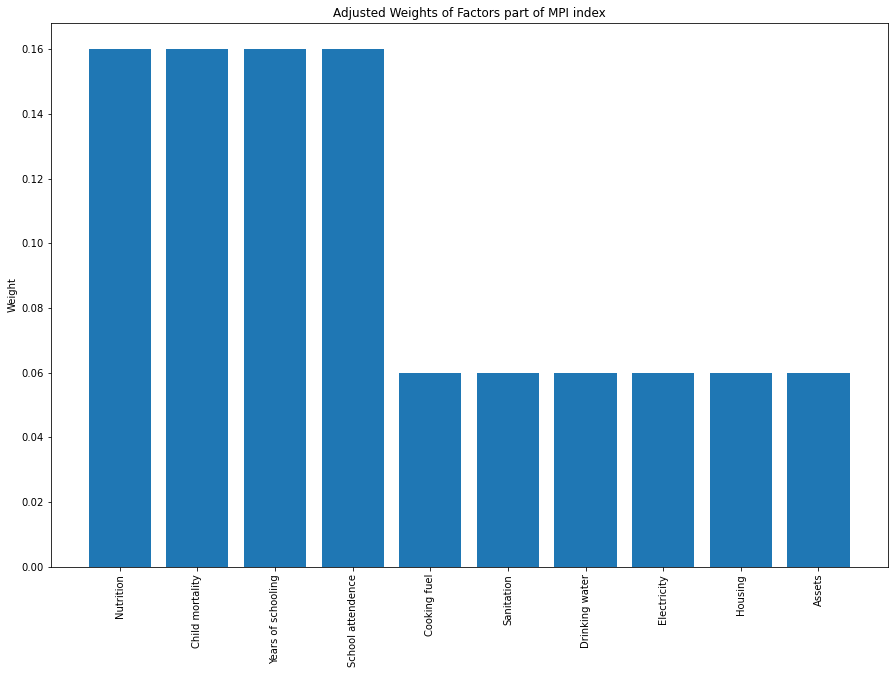

In [109]:
plot_mpi_factors_with_adjusted_weights(weights)

Above are the weights for each of the factor as defined by the Oxford Poverty and Human Development Initiative (OPHI).

In [110]:
weights = [0.05, 0.02, 0.05, 0.06, 0.02, 0.02, 0.15, 0.25, 0.2, 0.15]
new_df['New MPI'] = createNewMpiCalculatedColumn(weights, new_df, new_column_name)
new_df = new_df.sort_values(by = 'New MPI')
new_df = new_df.reset_index(drop=True)

print("Weights being tested: ", weights)
print(getDifferenceInPovertyIn2DFs(new_df.head(75), world_bank_df.head(75), 'CountryName'), "% match between MPI index and income based ratings")


Weights being tested:  [0.05, 0.02, 0.05, 0.06, 0.02, 0.02, 0.15, 0.25, 0.2, 0.15]
Russian Federation
St. Martin (French part)
South Sudan
Guinea
Costa Rica
Cote d'Ivoire
Slovenia
Pakistan
Israel
Marshall Islands
Guinea-Bissau
Panama
Channel Islands
Yemen, Rep.
Puerto Rico
Palau
Luxembourg
Tonga
Argentina
Mauritania
Somalia
Monaco
Moldova
Equatorial Guinea
Iceland
33.33333333333333 % match between MPI index and income based ratings


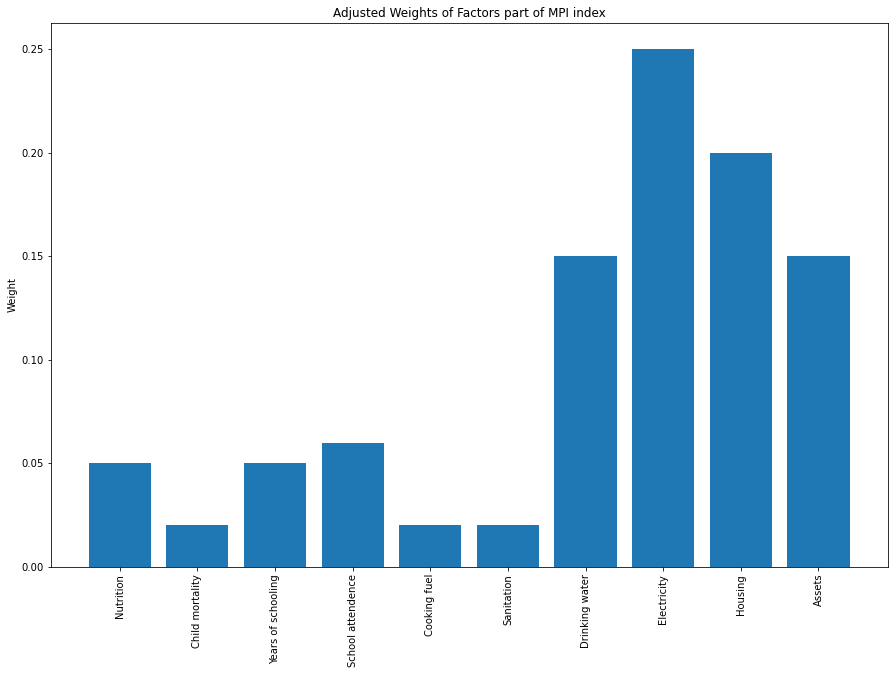

In [111]:
plot_mpi_factors_with_adjusted_weights(weights)

Here the factors drinking water, electricity, housing and assets were given the higher weights which resulted in a 33.33% accuracy.

In [112]:
weights = [0.45, 0.45, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01]
new_df['New MPI'] = createNewMpiCalculatedColumn(weights, new_df, new_column_name)
new_df = new_df.sort_values(by = 'New MPI')
new_df = new_df.reset_index(drop=True)

print("Weights being tested: ", weights)
print(getDifferenceInPovertyIn2DFs(new_df.head(75), world_bank_df.head(75), 'CountryName'), "% match between MPI index and income based ratings")

Weights being tested:  [0.45, 0.45, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01]
West Bank and Gaza
Russian Federation
Cayman Islands
Haiti
South Sudan
Costa Rica
Pakistan
Nepal
Israel
Egypt, Arab Rep.
Marshall Islands
Latvia
Yemen, Rep.
Puerto Rico
Ghana
Turkmenistan
Tonga
Dominica
Argentina
Jordan
Samoa
Monaco
Ireland
Equatorial Guinea
32.0 % match between MPI index and income based ratings


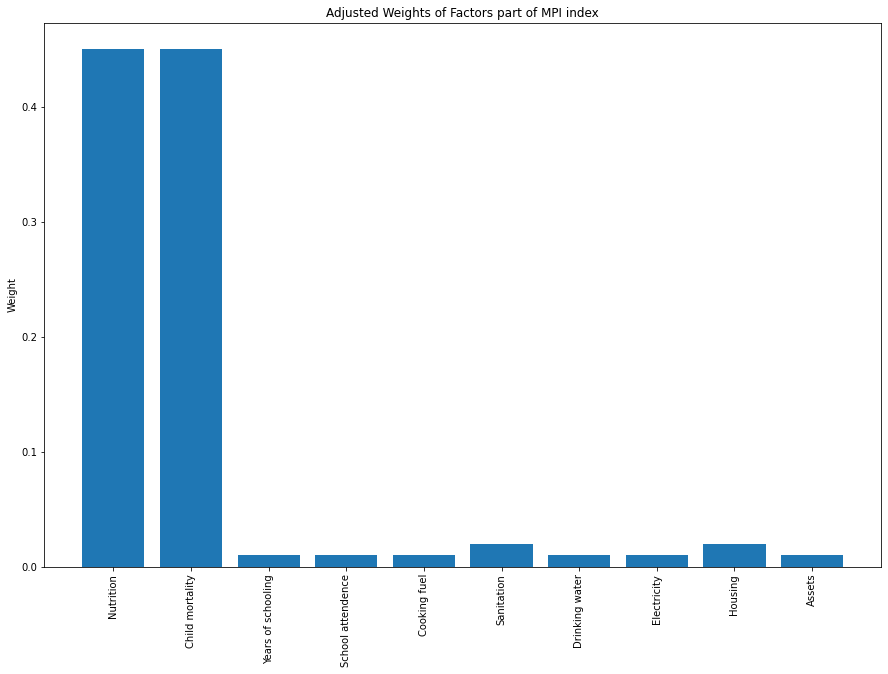

In [113]:
plot_mpi_factors_with_adjusted_weights(weights)

Here the factors nutrition and child mortality were given the higher weights which resulted in a 32% accuracy.

In [114]:
weights = [0.05, 0.02, 0.05, 0.06, 0.02, 0.02, 0.15, 0.25, 0.2, 0.15]
new_df['New MPI'] = createNewMpiCalculatedColumn(weights, new_df, new_column_name)
new_df = new_df.sort_values(by = 'New MPI')
new_df = new_df.reset_index(drop=True)

After testing with multiple combinations of adjusted MPI factors weight (only 3 are shown in this notebook), the weights, nutrition=0.24, child mortality=0.24, years of schooling=0.24, school attendence=0.24, cooking fuel=0.05, sanitation=0.05, drinking water=0.01, electricity=0.01, housing=0.01, assets=0.01 gave the higest accuracy of 33.33% after testing it multiple combinations (only 3 of which is shown above). The country ranking list obtained with this weights will be used to test the hypothesis.

# Hypothesis 1

The MPI urban and MPI rural are accurate indicators of the poverty levels (can verify by comparing it with the % population listed below poverty level)

The breakdown of the weights for each of the 10 factors used to calculate the MPI index. The factors drinking water, electricity, housing and assets were given the highest weights and this resulted in the best results we got in terms matching with the world banks poverty list. So, we will be proceeding with these weights for further analysis of the hypothesis.

In [115]:
urban_sorted_df = national_mpi_df.sort_values(by = 'MPI Urban')
urban_sorted_df = urban_sorted_df.reset_index(drop=True)
print("Countries matching between the comparisons of MPI Urban levels and weighted MPI levels:")
urban_matching_percent = getDifferenceInPovertyIn2DFs(new_df.head(25), urban_sorted_df.head(25), 'Code')
print()
print(urban_matching_percent, "% match between MPI Urban levels and weighted MPI levels")

Countries matching between the comparisons of MPI Urban levels and weighted MPI levels:
Kazakhstan
Serbia
Kyrgyzstan
Tunisia
Armenia
Macedonia, The former Yugoslav Republic of
Turkmenistan
Guyana
Bosnia and Herzegovina
Thailand
Mexico
Saint Lucia
Ukraine
Barbados
Palestine, State ofa
Jordan

64.0 % match between MPI Urban levels and weighted MPI levels


In [116]:
rural_sorted_df = national_mpi_df.sort_values(by = 'MPI Rural')
rural_sorted_df = rural_sorted_df.reset_index(drop=True)
print("Countries matching between the comparisons of MPI Rural levels and weighted MPI levels:")
rural_matching_percent = getDifferenceInPovertyIn2DFs(new_df.head(25), rural_sorted_df.head(25), 'Code')
print()
print(rural_matching_percent, "% match between MPI Rural levels and weighted MPI levels")

Countries matching between the comparisons of MPI Rural levels and weighted MPI levels:
Kazakhstan
Montenegro
Turkmenistan
Armenia
Bosnia and Herzegovina
Barbados
Serbia
Palestine, State ofa
Saint Lucia
Macedonia, The former Yugoslav Republic of
Thailand
Ukraine
Jamaica
Uzbekistan
Tunisia
Trinidad and Tobago

64.0 % match between MPI Rural levels and weighted MPI levels


When comparing the MPI Urban level based poverty rankings to the newly weighted MPI level rankings, there was a 64% match in the rankings for the top 25 countries and comparing the MPI Rural level based poverty rankings, there was a 64% match in the rankings for the top 25 countries. Since there is no significant evidence to say that the MPI Urban and Rural indicators are not matching well with the actual MPI indicator, the hypothesis is accepted which means that the MPI urban and MPI rural are accurate indicators of the poverty levels.

# Hypothesis 2

The higher the difference between the income of the highest 10% and the bottom 10%, the higher the chances are for a country to fall under most poor countries

In [117]:
wb_df = world_bank_df
wb_df['10% Difference'] = wb_df['Income_Highest_10'] - wb_df['Income_Lowest_10']
wb_df = wb_df.sort_values(by='10% Difference', ascending=False)
wb_df = wb_df.reset_index(drop=True)
wb_df.head(10)

,Country,Population_Below_Poverty_National_Year,Population_Below_Poverty_National,Population_Below_Poverty_Rural,Population_Below_Poverty_Urban,Poverty_Gap_Year,Reference_Year,World_Bank_Estimate,Income_Lowest_10,Income_Lowest_20,...,Income_Highest_10,Baseline_Year,Recent_Year,Annualized_Growth_Bottom_40,Annualized_Growth_Total_Population,Mean_Consumption_Bottom_40_Baseline,Mean_Consumption_Bottom_40_Most_Recent,Mean_Consumption_Total_Population_Baseline,Mean_Consumption_Total_Population_Most_Recent,10% Difference
0,Slovak Republic,2017.0,12.2,NaN,NaN,NaN,2014.0,63.0,0.9,2.4,...,50.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.6
1,Russian Federation,2018.0,12.9,NaN,NaN,NaN,2017.0,56.3,1.3,3.9,...,49.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8
2,Morocco,2013.0,4.8,1.4,15.0,2017.0,2015.0,59.1,1.0,2.8,...,47.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.3
3,Cayman Islands,NaN,NaN,65.9,82.9,2008.0,2008.0,56.2,1.2,3.3,...,46.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
4,Mongolia,2018.0,28.4,0.9,7.3,2013.0,2014.0,54.0,1.6,4.2,...,45.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.9
5,West Bank and Gaza,2016.0,29.2,0.8,4.5,2016.0,2015.0,57.1,1.0,2.9,...,44.4,2011.0,2016.0,-0.9,-0.6,5.5,5.2,11.2,10.9,43.4
6,Brazil,NaN,NaN,4.4,9.1,2018.0,2018.0,53.9,1.0,3.1,...,42.5,2013.0,2018.0,-0.4,0.7,5.6,5.5,20.3,21.0,41.5
7,Belize,NaN,NaN,13.9,27.7,1999.0,1999.0,53.3,0.9,3.2,...,42.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.5
8,St. Martin (French part),NaN,NaN,23.4,42.8,1999.0,2016.0,54.6,1.4,3.7,...,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.3
9,Guinea,2018.0,43.7,11.7,25.2,1998.0,2010.0,50.7,1.6,4.5,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.4


In [118]:
print("Countries matching between the comparisons of difference between highest and lowest 10% income:")
world_bank_df = world_bank_df.sort_values(by = 'World_Bank_Estimate', ascending=False)
world_bank_df = world_bank_df.reset_index(drop=True)
matching_percent = getDifferenceInPovertyIn2DFs(wb_df.head(25), world_bank_df.head(25), 'CountryName')
print()
print(matching_percent, "% match between the difference between highest and lowest 10% income")

Countries matching between the comparisons of difference between highest and lowest 10% income:
Slovak Republic
Morocco
St. Lucia
West Bank and Gaza
Russian Federation
Cayman Islands
St. Martin (French part)
Mongolia
Brazil
Belize
Botswana
Haiti
Angola
South Sudan
Guinea
Comoros
Norway
Costa Rica
Guam
Cote d'Ivoire
Sao Tome and Principe

84.0 % match between the difference between highest and lowest 10% income


After getting poverty rankings with the difference between the highest and lowest 10% income, it was compared to the weighted MPI list to check for similarity which gave a 84% match. The income difference list was sorted in reverse order so that the countries are listed according to their difference between the income of highest and lowest 10%. This is later compared to the MPI index list and got a 84% match, which allows us to conclude that 84% of the 25 countries with highest income difference appeared in the 25 countries list of the weighted MPI index. The higher accuracy allows us to accept the hypothesis which means that the higher the difference between the income of the highest 10% and the bottom 10%, the higher the chances are for a country to fall under most poor countries.

# Hypothesis 3

The higher the annualized growth of the bottom 40% of people in terms of income the higher the chances are for that country to push of the poverty zone

In [119]:
wb_df = world_bank_df
wb_df = wb_df.sort_values(by='Annualized_Growth_Bottom_40', ascending=False)
wb_df = wb_df.reset_index(drop=True)
wb_df.head(10)

,Country,Population_Below_Poverty_National_Year,Population_Below_Poverty_National,Population_Below_Poverty_Rural,Population_Below_Poverty_Urban,Poverty_Gap_Year,Reference_Year,World_Bank_Estimate,Income_Lowest_10,Income_Lowest_20,...,Income_Highest_10,Baseline_Year,Recent_Year,Annualized_Growth_Bottom_40,Annualized_Growth_Total_Population,Mean_Consumption_Bottom_40_Baseline,Mean_Consumption_Bottom_40_Most_Recent,Mean_Consumption_Total_Population_Baseline,Mean_Consumption_Total_Population_Most_Recent,10% Difference
0,Portugal,2018.0,17.2,3.1,6.3,2017.0,2018.0,37.5,2.9,7.1,...,29.9,2012.0,2017.0,10.0,10.0,4.2,6.8,10.1,16.3,27.0
1,Chile,2017.0,8.6,0.5,5.4,2016.0,2016.0,38.5,2.7,6.5,...,29.4,2013.0,2016.0,8.4,7.1,3.9,5.0,9.5,11.6,26.7
2,Madagascar,2012.0,70.7,0.0,0.2,2015.0,2016.0,31.3,3.4,8.3,...,25.2,2015.0,2016.0,8.3,6.0,11.1,11.1,28.0,28.0,21.8
3,Eswatini,2017.0,58.9,NaN,NaN,NaN,2017.0,30.4,3.0,8.1,...,22.5,2012.0,2017.0,8.0,7.2,12.1,17.8,24.2,34.3,19.5
4,Lao PDR,2018.0,18.3,0.0,0.1,2011.0,2011.0,31.8,3.1,7.9,...,24.8,2012.0,2017.0,7.9,8.2,8.3,12.1,17.9,26.6,21.7
5,Luxembourg,2017.0,18.3,4.6,9.0,2017.0,2012.0,42.6,2.2,5.7,...,33.5,2012.0,2017.0,7.1,4.3,3.7,5.3,9.5,11.7,31.3
6,Liechtenstein,NaN,NaN,0.3,0.4,2017.0,2017.0,34.9,2.4,6.5,...,25.8,2012.0,2017.0,6.3,7.4,9.4,12.8,20.0,28.7,23.4
7,Paraguay,2018.0,24.2,0.3,0.6,2017.0,2017.0,33.8,2.7,7.4,...,26.7,2012.0,2017.0,6.0,4.0,11.2,15.0,22.8,27.8,24.0
8,Mozambique,2014.0,46.1,13.8,30.3,2015.0,2010.0,32.8,3.5,8.3,...,26.4,2009.0,2015.0,5.7,6.6,1.7,2.4,7.6,11.0,22.9
9,Cuba,NaN,NaN,NaN,NaN,NaN,2017.0,30.4,2.7,7.4,...,22.8,2012.0,2017.0,5.5,4.3,8.7,11.4,17.8,21.9,20.1


In [120]:
print("Countries matching after the comparisons of Annualized Growth of Bottom 40% income bracket people:")
world_bank_df = world_bank_df.sort_values(by = 'World_Bank_Estimate')
world_bank_df = world_bank_df.reset_index(drop=True)
matching_percent = getDifferenceInPovertyIn2DFs(wb_df.head(25), new_df.head(25), 'CountryName')
print()
print(matching_percent, "% match after the comparisons of Annualized Growth of Bottom 40% income bracket people")

Countries matching after the comparisons of Annualized Growth of Bottom 40% income bracket people:
Thailand
Albania
Montenegro

12.0 % match after the comparisons of Annualized Growth of Bottom 40% income bracket people


The country poverty list based on the highest annualized grwoth of bottom 40% income bracket people was prepared and compared with the weighted MPI list and only 12% of countries came to be common, which means that only 12% of the top 25 countries in the annualized grwoth list was found in the top 25 of the MPI list. This is not a strong enough evidence to accept the hypothesis. Hence, the hypothesis is rejected meaning the higher the annualized growth of the bottom 40% of people in terms of income does not mean that chances for that country to push of the poverty zone is high.   